In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import warnings as wr
wr.filterwarnings('ignore')

In [124]:
data=pd.read_excel("QUEUING DATA FOR R.xlsx")
inter_arrival_times = data[data.columns[0]]
service_times = data[data.columns[1]]
num_customers = len(inter_arrival_times)

In [125]:
class Queiung_GG_Model():
    def __init__(self,arrival_rate, service_rate,variance_of_the_service_time,variance_of_the_arrival_time,num_servers=1) -> None:
        
        self.arrival_rate,self.service_rate,self.num_servers=arrival_rate, service_rate,num_servers
        self.ro=self.utilization_factor(arrival_rate, service_rate,num_servers)
        self.variance_of_the_service_time,self.var_of_inter_arrrival_time=variance_of_the_service_time,variance_of_the_arrival_time
    
    def utilization_factor(self,arrival_rate, service_rate,num_servers=1): 
        """Utilization of the server; also the probability that the server is busy or 
        the proportion of time the server is busy

        Args:
            arrival_rate (float): average rate
            service_rate (float): service rate
            num_servers (int): number of servers

        Returns:
            float: returns the utilsation or probability 
        """
        return arrival_rate / (num_servers*service_rate)

    def probability_empty_system(self,utilization_factor):
         1 - utilization_factor
    def avg_num_customers_queue(self,ro, C_sqrd_s,C_sqrd_a):
        """Calcuate the mean number of customers in the queue using Marchal’s approximation

        Args:
            ro(double): Utilisation or probabilty
            C_sqrd_s (double):squared coefficient of variation of service time
            C_sqrd_a (double): squared coefficient of variation of inter-arrival time

        Returns:
            float: mean number of customers in the queue
        """
        return ((ro**2)*(1+C_sqrd_s)*(C_sqrd_a+(ro**2)*C_sqrd_s))/(2*(1-ro)*(1+(ro**2*C_sqrd_s)))

    def avg_time_customer_queue(self,Lq,lamda):
        return Lq/lamda

    def avg_num_customers_system(self,W,lamda):
        """Calculate mean number of customers in the system

        Args:
            W (double): Waiting time in the system
            lamda (double): Arrival Rate

        Returns:
            float: mean number of customers in the system
        """
        return lamda*W

    def avg_time_customer_system(self,Wq, mu):
        """Calcutae mean waiting time in the system

        Args:
            Wq (double): Wait in the queue =self.
            mu (double): service rate

        Returns:
            float:mean waiting time in the system
        """
        return Wq+(1/mu)
    def squared_coefficiency_of_variation(self,variance,mean):
        """ squared coefficient of variation of a random variable; C^2 =self.Variance/(Mean)^2

        Args:
            variance (double): variance
            mean (double): mean
        Returns:
            double: squared coefficient of variation
        """
        return variance/(mean**2)

    def sqrd_coef_of_var_of_service_time(self,mu,var_of_svc_time):
        """Calculate squared coefficient of variation of service time
        """
        return var_of_svc_time/((1/mu)**2)
    def sqrd_coef_of_var_of_inter_arrival_time(self,lamda,var_of_inter_arrival):
        """Return squared coefficient of variation of service time
        """
        return var_of_inter_arrival/((1/lamda)**2)
    def summary(self):
        """
        Returns the summary of the Model
        """
        arrival_rate =self.arrival_rate#lamda
        service_rate =self.service_rate #mu
        var_of_inter_arrrival_time=self.var_of_inter_arrrival_time
        variance_of_the_service_time=self.variance_of_the_service_time
        ro=self.ro
        
        C_sqrd_a=self.sqrd_coef_of_var_of_inter_arrival_time(arrival_rate,var_of_inter_arrrival_time)
        C_sqrd_s=self.sqrd_coef_of_var_of_service_time(service_rate,variance_of_the_service_time)
        Lq=self.avg_num_customers_queue(ro,C_sqrd_s,C_sqrd_a)
        Wq=self.avg_time_customer_queue(Lq,arrival_rate)
        W=self.avg_time_customer_system(Wq,service_rate)
        L=self.avg_num_customers_system(W,arrival_rate)
        
        return {"Lq":Lq,"Wq":Wq,"W":W,"L":L,"mu":service_rate,"lamda":arrival_rate,"Rho":self.ro}

In [126]:
def cal_mu(service_times):
    #average service time
    avg_service_time = sum(service_times) / len(service_times)
    # Service rate (mu) is the reciprocal of average service time
    mu = 1 / avg_service_time
    return mu

def cal_inter_arrival(arrival_times):
    interarrival_times = [arrival_times[i] - arrival_times[i - 1] for i in range(1, len(arrival_times))]
    return interarrival_times
def calculate_lamda(interarrival_times:list=None,arrival_times:list=None):
    # Calculate average interarrival tim
    if interarrival_times is None:
        if arrival_times is None:
            raise "Both arrival_times and inter_arrival_times can not be Null"
        interarrival_times=cal_inter_arrival(arrival_times)
    
    avg_interarrival_time = sum(interarrival_times) / len(interarrival_times)
    #arrival rate (lambda)
    lambda_ = 1 / avg_interarrival_time
    return lambda_


def cal_variance_service_time(service_times):
    # mean service time
    mean_service_time = np.mean(service_times)

    #squared differences
    squared_diffs = [(x - mean_service_time) ** 2 for x in service_times]

    #Calculate average of squared differences (variance)
    return np.mean(squared_diffs)

def cal_variance_of_inter_arrival_rate( interarrival_times):
    
    # Calculate mean interarrival time
    mean_interarrival_time = np.mean(interarrival_times)

    #Calculate squared differences
    squared_diffs_interarrival = [(x - mean_interarrival_time) ** 2 for x in interarrival_times]

    # Calculate variance of interarrival times
    variance_interarrival_time = np.mean(squared_diffs_interarrival)

    return variance_interarrival_time


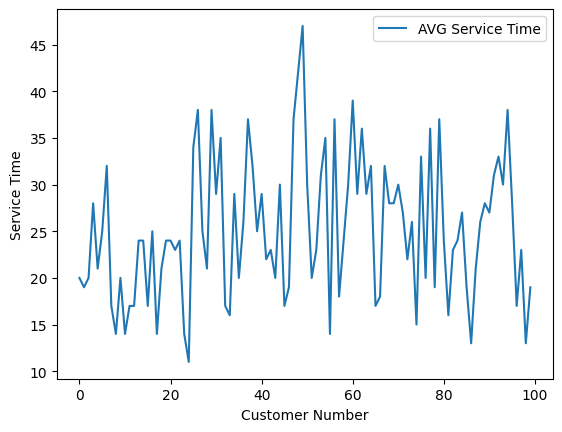

In [127]:
plt.plot(service_times,label="AVG Service Time")
plt.legend()
plt.xlabel("Customer Number")
plt.ylabel("Service Time")
plt.show()


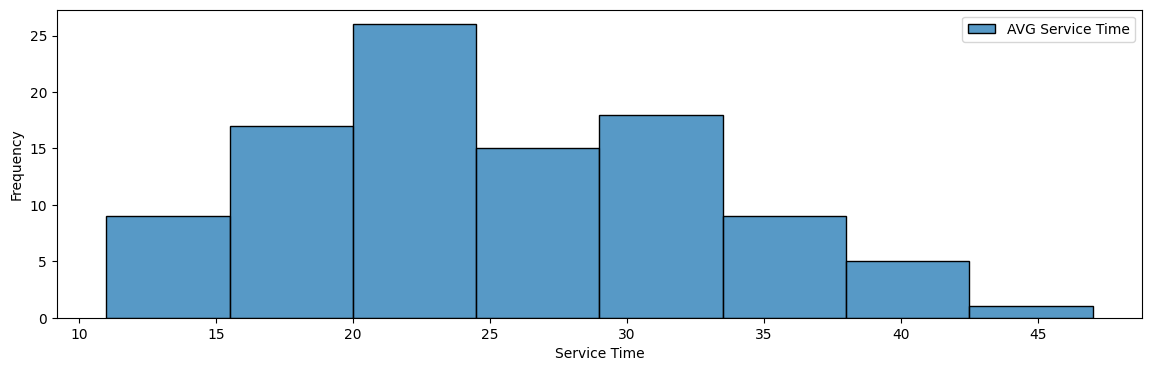

In [128]:
plt.figure(figsize=(14,4))
sns.histplot(service_times,label="AVG Service Time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Service Time")
plt.show()

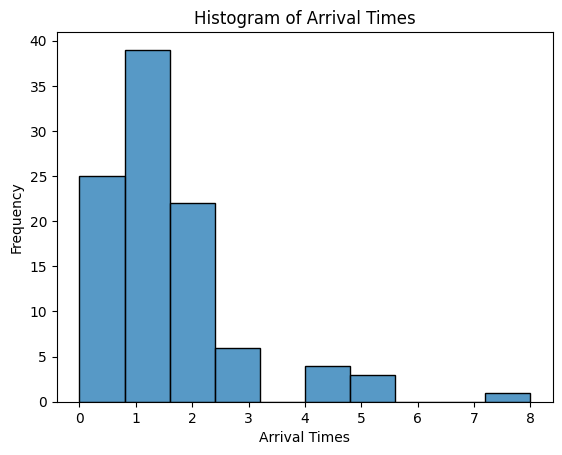

In [129]:
sns.histplot(inter_arrival_times, bins=10, kde=False)
plt.xlabel("Arrival Times")
plt.ylabel("Frequency")
plt.title("Histogram of Arrival Times")
plt.show()

Create a Model and See results

In [133]:
mu=cal_mu(service_times)  # example 1/8 
variance_service_time=cal_variance_service_time(service_times) #exmaple 25
lamda=calculate_lamda(interarrival_times=inter_arrival_times) #example 1/10
var_inter_arrival_rate=cal_variance_of_inter_arrival_rate(inter_arrival_times) #example 20
gg1_model=Queiung_GG_Model(lamda,mu,variance_service_time,var_inter_arrival_rate,3)

print(gg1_model.summary())

{'Lq': -3.8750328606873605, 'Wq': -5.425046004962304, 'W': 19.694953995037697, 'L': 14.067824282169784, 'mu': 0.03980891719745223, 'lamda': 0.7142857142857143, 'Rho': 5.980952380952381}
